In [41]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [43]:
len(X_train)

60000

In [44]:
len(X_test)

10000

In [45]:
X_train[0].shape

(28, 28)

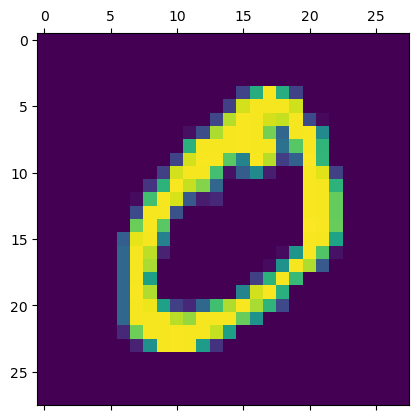

In [46]:
plt.matshow(X_train[1])

In [47]:
y_train[1]

0

In [48]:
X_train=X_train/255

In [49]:
X_test=X_test/255

In [50]:
y_train[1:10]

array([0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
X_train_flat=X_train.reshape(len(X_train),28*28)

In [53]:
X_train_flat.shape

(60000, 784)

In [54]:
X_test_flat=X_test.reshape(len(X_test),28*28)

In [55]:
X_test_flat.shape

(10000, 784)

In [56]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 546us/step - loss: 0.4728 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 1s 529us/step - loss: 0.3039 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 1s 530us/step - loss: 0.2838 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 529us/step - loss: 0.2733 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.2667 - accuracy: 0.9253


In [57]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 448us/step - loss: 0.2668 - accuracy: 0.9257


[0.26684245467185974, 0.9257000088691711]

In [58]:
y_predicted=model.predict(X_test_flat)
y_predicted[1]

313/313 [==============================] - 0s 385us/step


array([4.8179254e-01, 5.1630777e-03, 9.9932343e-01, 2.9014668e-01,
       4.1634282e-10, 8.4362805e-01, 8.4395510e-01, 4.4920231e-13,
       1.3842918e-01, 2.3111140e-09], dtype=float32)

In [59]:
np.argmax(y_predicted[1])

2

In [60]:
y_predicted_lables=[np.argmax(i)for i in y_predicted]
y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [61]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)

In [62]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    4,    2,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,   10,  927,   16,    8,    2,   13,    9,   38,    4],
       [   4,    0,   20,  924,    1,   23,    2,    9,   18,    9],
       [   1,    2,    3,    1,  914,    0,   11,    3,    8,   39],
       [  10,    3,    3,   36,   11,  763,   15,    6,   36,    9],
       [  11,    3,    5,    1,    7,   10,  918,    2,    1,    0],
       [   1,    8,   24,    9,   10,    1,    0,  930,    2,   43],
       [   6,   12,    5,   22,    9,   19,   10,    9,  870,   12],
       [  10,    7,    1,   12,   25,    4,    0,   11,    7,  932]],
      dtype=int32)>

<Axes: >

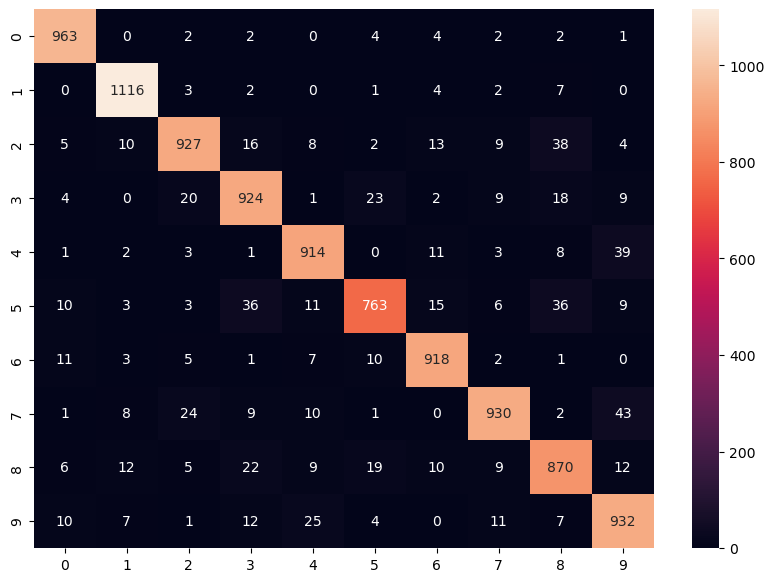

In [63]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
# plt.xlable('Predicted')
# plt.ylable('Truth')

In [64]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 776us/step - loss: 0.2750 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.1252 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.0882 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.0664 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.0522 - accuracy: 0.9837


In [65]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 0s 555us/step - loss: 0.0837 - accuracy: 0.9751


[0.08370828628540039, 0.9750999808311462]

313/313 [==============================] - 0s 470us/step


<Axes: >

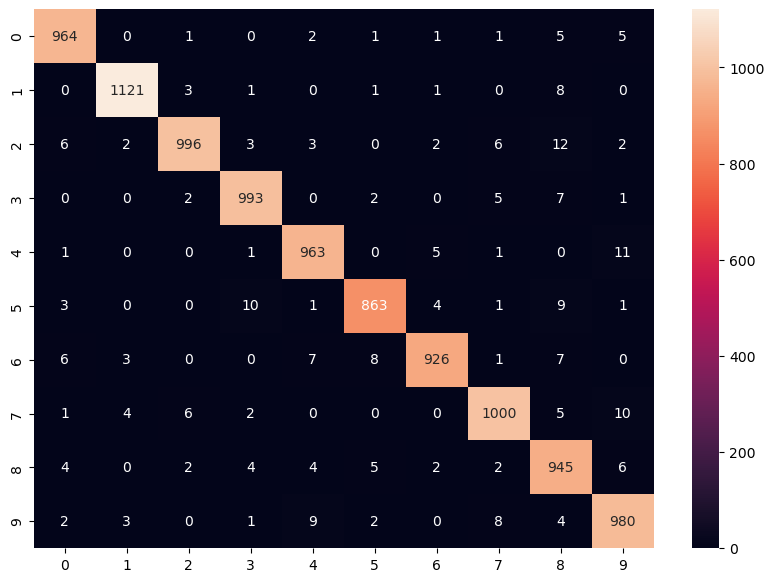

In [66]:
y_predicted=model.predict(X_test_flat)
y_predicted_lables=[np.argmax(i)for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
# plt.xlable('Predicted')
# plt.ylable('Truth')

In [67]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 792us/step - loss: 0.2823 - accuracy: 0.9198
Epoch 2/5
1875/1875 [==============================] - 1s 774us/step - loss: 0.1304 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.0915 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.0683 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 1s 764us/step - loss: 0.0557 - accuracy: 0.9824


In [68]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
)
model.fit(X_train,y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 2s 805us/step - loss: 0.2721 - Accuracy: 0.9222
Epoch 2/10
1875/1875 [==============================] - 1s 779us/step - loss: 0.1229 - Accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.0867 - Accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.0658 - Accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.0524 - Accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.0415 - Accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 1s 798us/step - loss: 0.0340 - Accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.0288 - Accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 1s 789us/step - loss: 0.0235 - Accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 1s 780u

In [69]:
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)
model.compile(
optimizer='SGD',
loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
)
model.fit(X_train,y_train,epochs=10,callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 1s 713us/step - loss: 0.0095 - Accuracy: 0.9978
Epoch 2/10
1875/1875 [==============================] - 1s 710us/step - loss: 0.0079 - Accuracy: 0.9986
Epoch 3/10
1875/1875 [==============================] - 1s 709us/step - loss: 0.0072 - Accuracy: 0.9990
Epoch 4/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.0068 - Accuracy: 0.9991
Epoch 5/10
1875/1875 [==============================] - 1s 706us/step - loss: 0.0064 - Accuracy: 0.9992
Epoch 6/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.0062 - Accuracy: 0.9993
Epoch 7/10
1875/1875 [==============================] - 1s 702us/step - loss: 0.0060 - Accuracy: 0.9993
Epoch 8/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.0058 - Accuracy: 0.9994
Epoch 9/10
1875/1875 [==============================] - 1s 724us/step - loss: 0.0057 - Accuracy: 0.9994
Epoch 10/10
1875/1875 [==============================] - 1s 705u

In [70]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 555us/step - loss: 0.0683 - Accuracy: 0.9816


[0.06830251216888428, 0.9815999865531921]

In [71]:
%load_ext tensorboard
%tensorboard --logdir=logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6008 (pid 85907), started 0:01:47 ago. (Use '!kill 85907' to kill it.)

##### Convolutional Neural Network

In [73]:
model = keras.Sequential([
    
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [74]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1560 - accuracy: 0.9535
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0541 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0164 - accuracy: 0.9948


In [75]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [76]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9852


[0.051761701703071594, 0.9851999878883362]